In [1]:
import os
from glob import glob
import numpy as np
from PIL import Image, ImageDraw

In [2]:
def makeMono(image, cutoff=100):
    width, height = image.size
    mono = image.convert('L')
    mono = np.array(mono)

    # Clean up using cutoff value.
    x = mono.flatten()
    x[x < cutoff] = 0
    x[x >= cutoff] = 255

    x = np.reshape(x, (height, width)).astype('uint8')
    
    return x

In [5]:
image = Image.open("rotated/06.1.2.jpg")
width, height = image.size
mono = makeMono(image, 120)

0


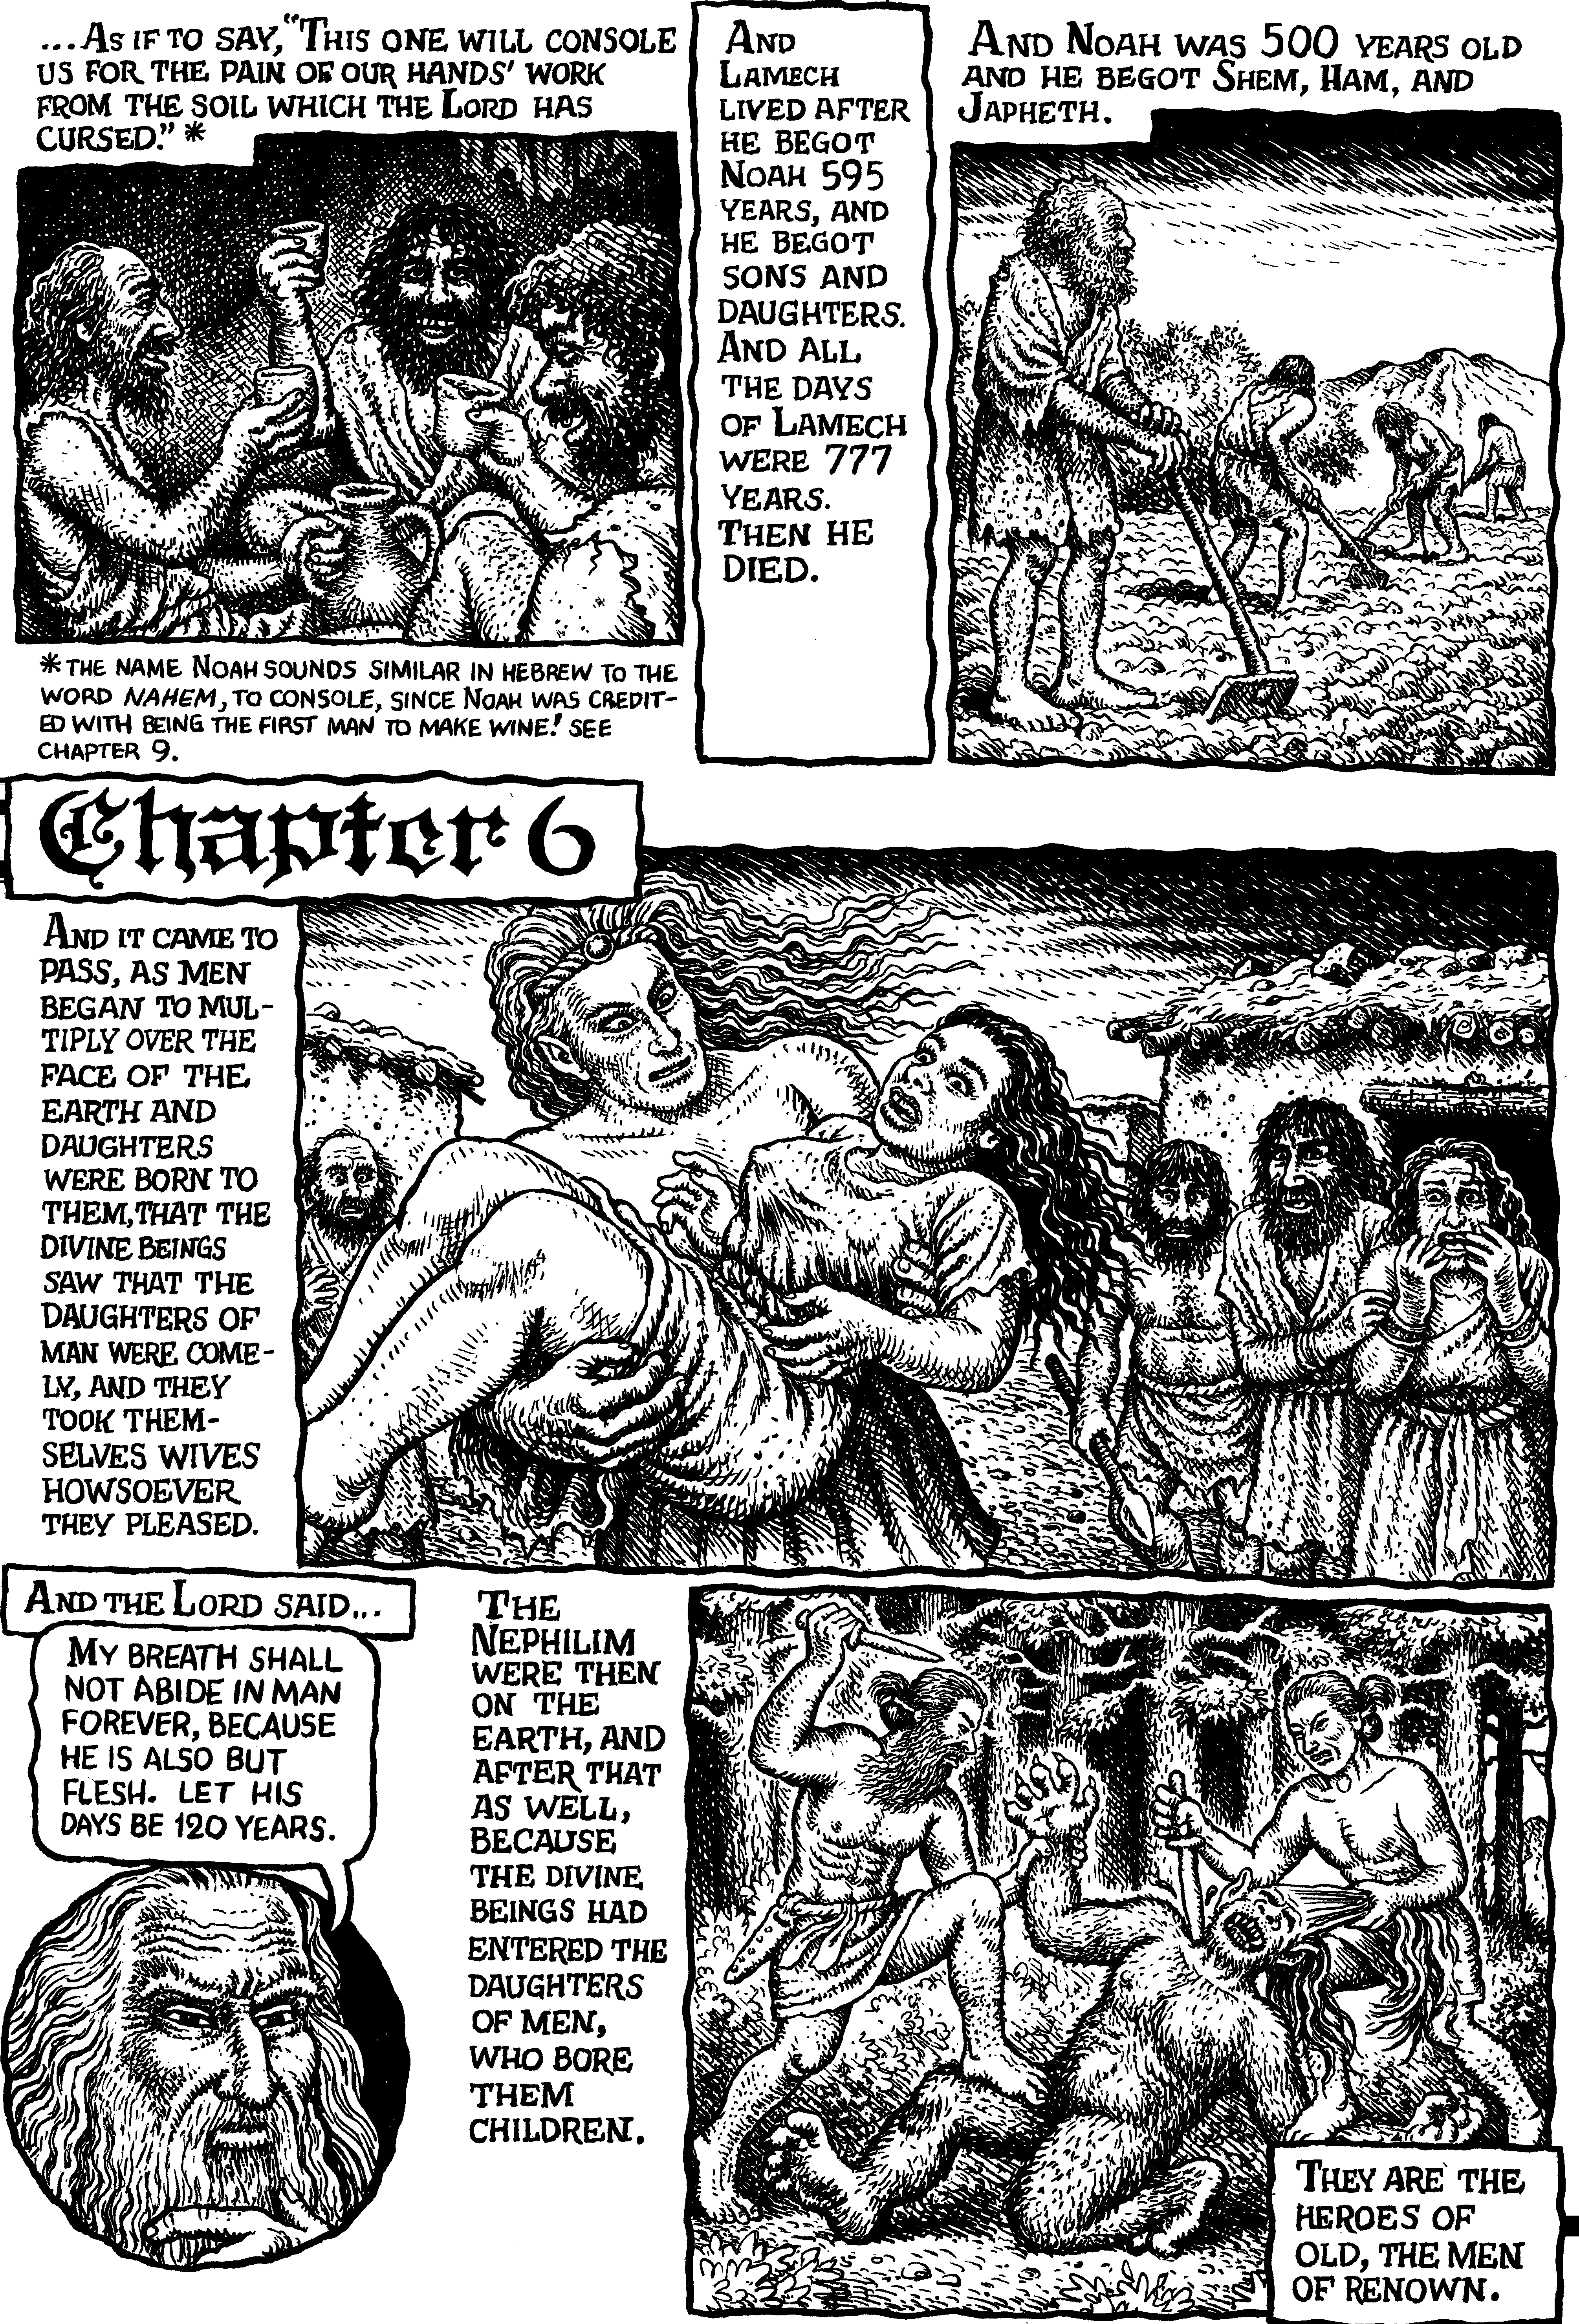

In [6]:
strip = []
sentinel = 0
wiggle = 30

for row in range(sentinel, height, 1):
    if sum(mono[row]) < 255*(width-wiggle):
        strip.append(mono[row])
    else:
        sentinel = row
        break
print(sentinel)

x = np.array(strip).astype('uint8')
i = Image.fromarray(x)
i

13
433


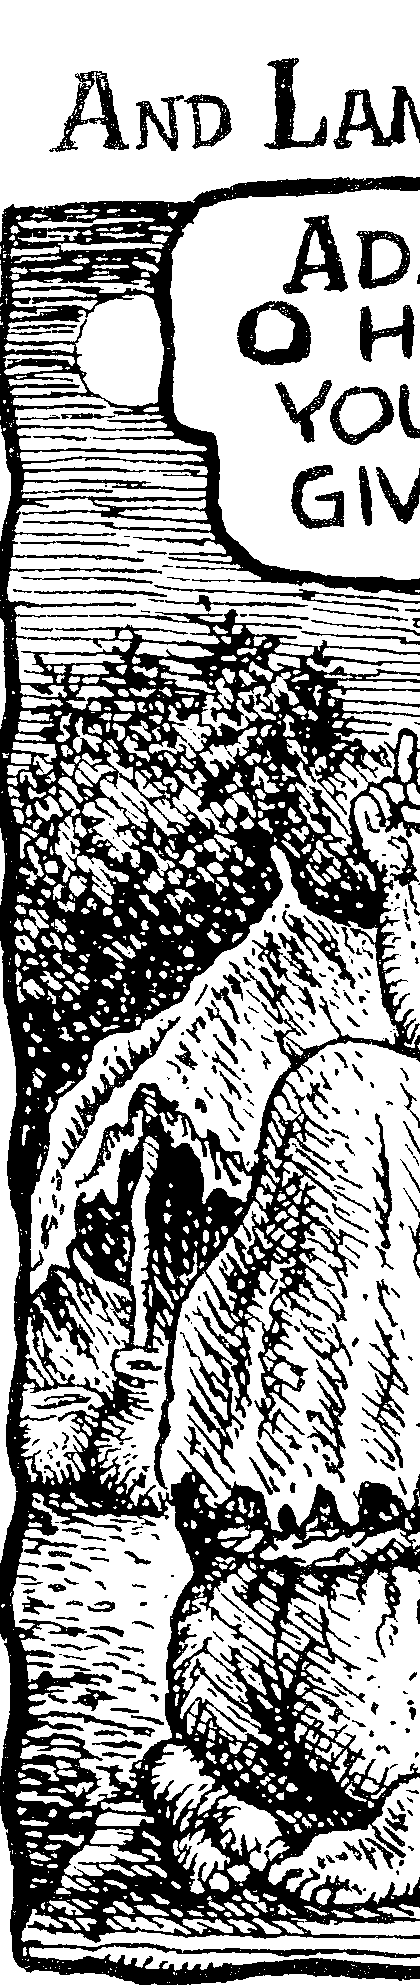

In [80]:
y = x.transpose()
panel = []
panelSentinel = 0
wiggle = 369

while sum(y[panelSentinel]) >= 255*(sentinel-wiggle):
    panelSentinel += 1
print(panelSentinel)
    
for row in range(panelSentinel, width, 1):
    if sum(y[row]) < 255*(sentinel-wiggle):
        panel.append(y[row])
    else:
        panelSentinel = row
        break
print(panelSentinel)

z = np.array(panel).astype('uint8').transpose()
i = Image.fromarray(z)
i

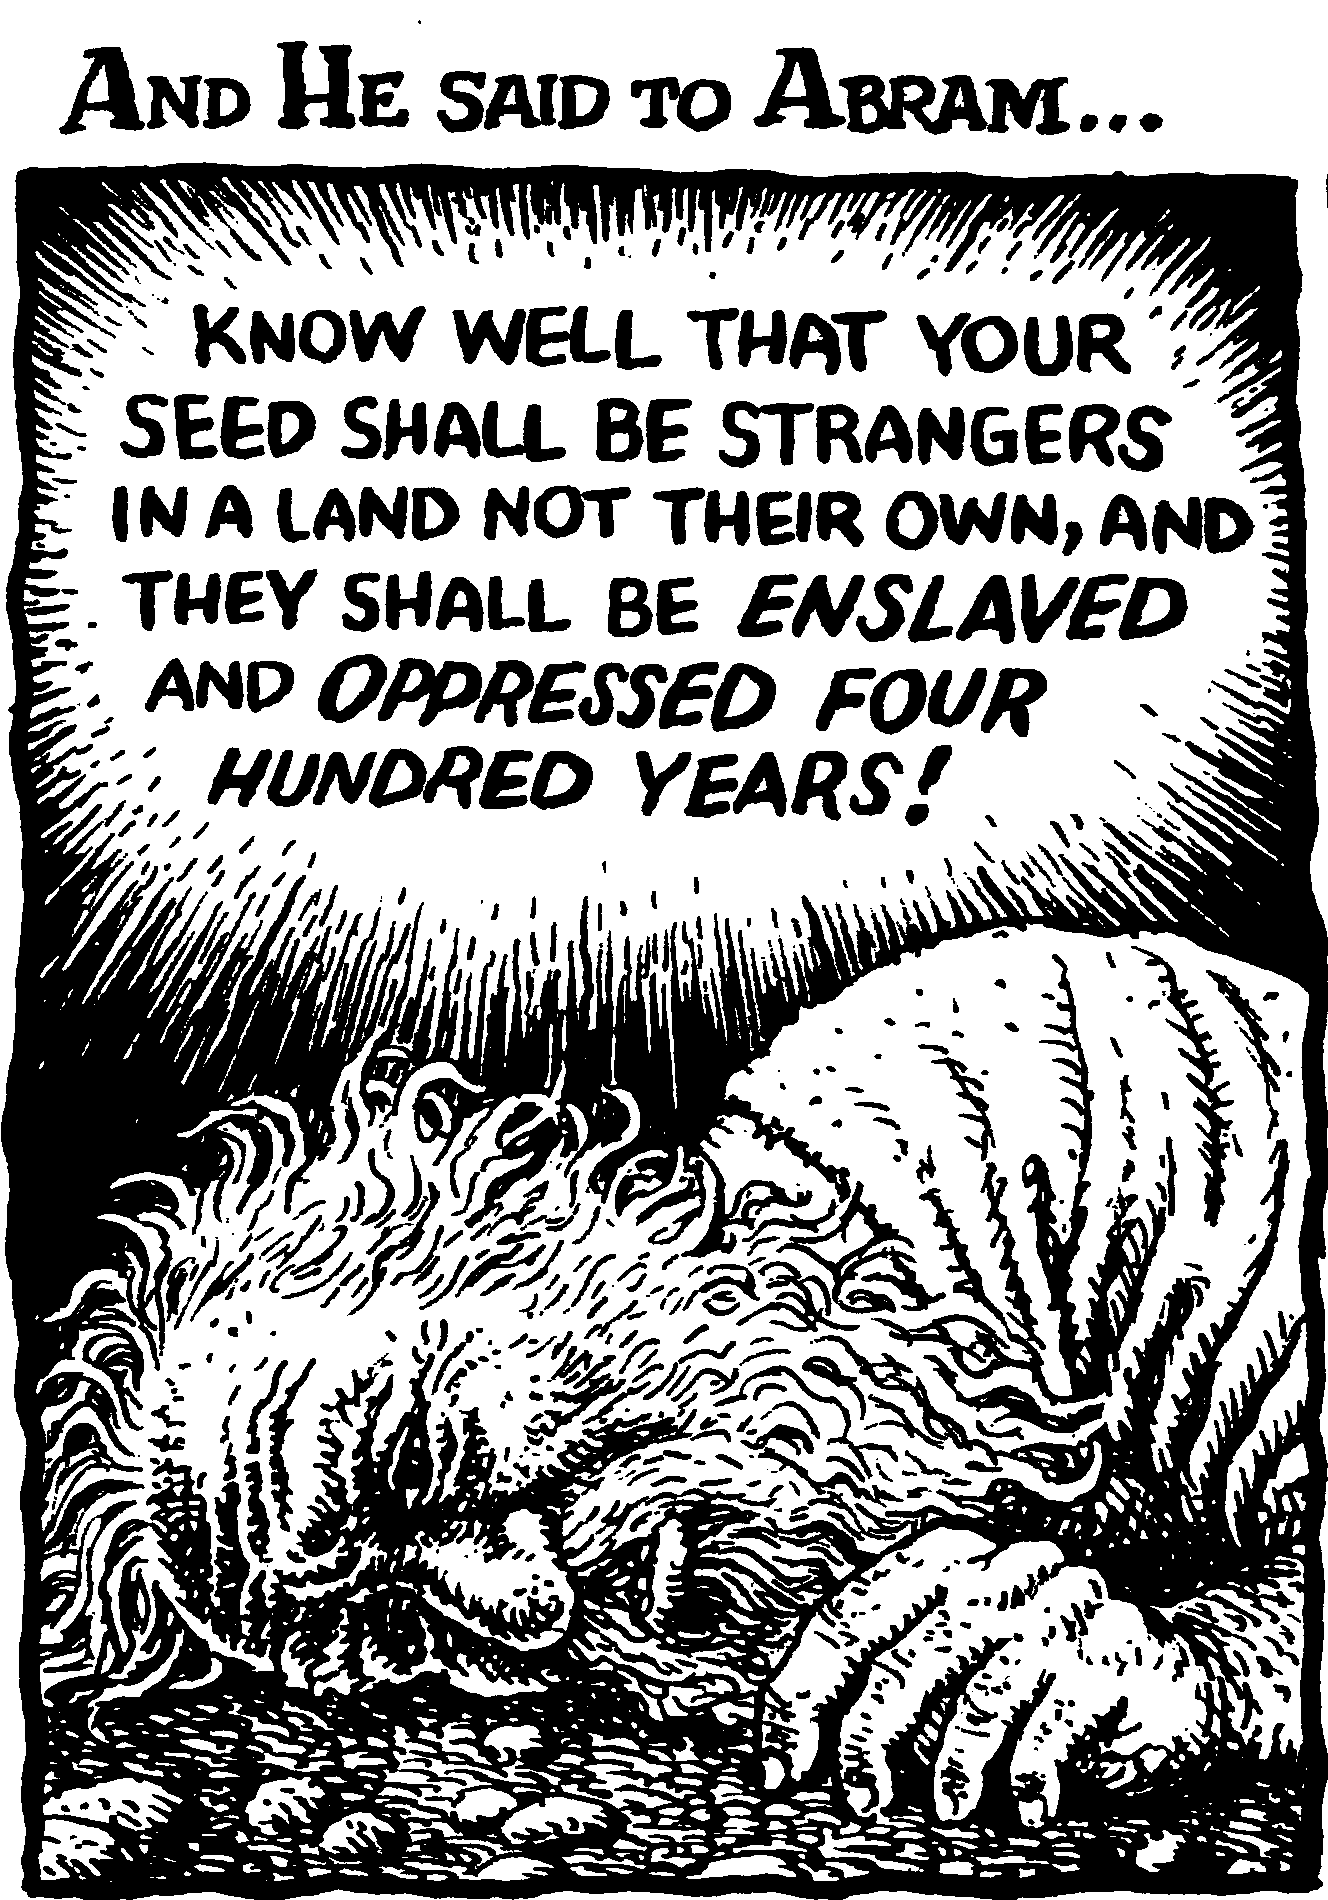

In [31]:
i = Image.fromarray(makeMono(image, 200)).crop((0,0,1328,1900))
i 